## Predicting if a person would buy life insurnace based on his age using logistic regression


In [1]:
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv("insurance_data.csv")
df.head()

,age,bought_insurance
0,22,0
1,25,0
2,47,1
3,52,0
4,46,1


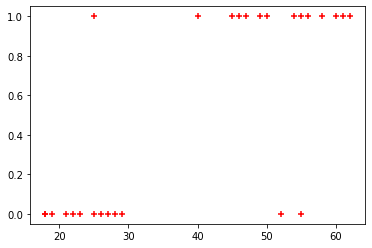

In [3]:
plt.scatter(df.age,df.bought_insurance,marker='+',color='red')


In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df[['age']],df.bought_insurance,train_size=0.8)


In [5]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)
y_predicted = model.predict(X_test)
y_predicted

array([1, 1, 1, 0, 0, 1], dtype=int64)

In [6]:
model.predict_proba(X_test)


array([[0.11554164, 0.88445836],
       [0.05660965, 0.94339035],
       [0.02682429, 0.97317571],
       [0.86464717, 0.13535283],
       [0.94995896, 0.05004104],
       [0.17242024, 0.82757976]])

In [7]:
model.score(X_test,y_test)


0.8333333333333334

In [8]:
model.coef_


array([[0.15559124]])

In [9]:
model.intercept_


array([-5.74421766])

In [10]:
# Lets defined sigmoid function now and do the math with hand

import math
def sigmoid(x):
  return 1 / (1 + math.exp(-x))
def prediction_function(age):
    z = 0.042 * age - 1.53 # 0.04150133 ~ 0.042 and -1.52726963 ~ -1.53
    y = sigmoid(z)
    return y


In [11]:
age = 35
prediction_function(age)
# 0.485 is less than 0.5 which means person with 35 age will not buy insurance



0.4850044983805899

In [12]:
age = 43
prediction_function(age)
# 0.485 is more than 0.5 which means person with 43 will buy the insurance

0.568565299077705

## Confusion Matrix

In [33]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_predicted)
cm

array([[2, 1],
       [0, 3]], dtype=int64)

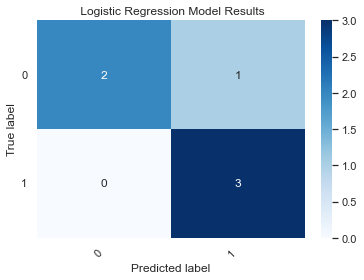

In [38]:
import matplotlib.pyplot as plt

import seaborn as sns

plt.figure()

heatmap = sns.heatmap(cm, annot=True, cmap="Blues")

heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right')

heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right')

plt.ylabel('True label')

plt.xlabel('Predicted label')

plt.title(' Logistic Regression Model Results')

plt.show()   

## Accuracy

In [36]:
from sklearn.metrics import accuracy_score

print("Accuracy: ", accuracy_score(y_test, y_predicted))

Accuracy:  0.8333333333333334


## ROC Curve and AUC Curve

In [39]:
from sklearn.metrics import roc_curve, roc_auc_score


In [44]:
y_pred_proba = model.predict_proba(np.array(X_test))[:,1]

fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


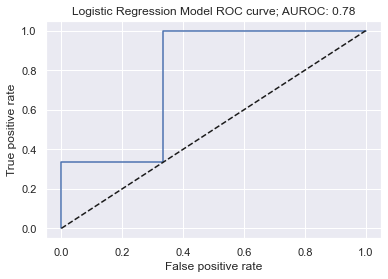

In [45]:
sns.set()

plt.plot(fpr, tpr)

plt.plot(fpr, fpr, linestyle = '--', color = 'k')

plt.xlabel('False positive rate')

plt.ylabel('True positive rate')

AUROC = np.round(roc_auc_score(y_test, y_pred_proba), 2)

plt.title(f'Logistic Regression Model ROC curve; AUROC: {AUROC}');

plt.show()